In [190]:
using StatsBase
using Plots
using WebIO
using Suppressor
gr()

Plots.GRBackend()

# Define Individual

In [2]:
struct individual
    chromosomes :: Array{Bool,1}
    function individual()
        new(rand(Bool,2))
    end
    function individual(chr::Array{Bool,1})
        new(chr)
    end
end

# Define Functions

## Define functions on Individuals

In [212]:
function reproduce(p1::individual, p2::individual)::Tuple{individual,individual}
    d1 = individual([rand(p1.chromosomes), rand(p2.chromosomes)])
    d2 = individual([rand(p1.chromosomes), rand(p2.chromosomes)])
    return (d1,d2)
end

function death(i::individual, selecttype::Bool)::Bool
    chance = 0.75
    if phenotype(i) == selecttype
        chance = 0.25
    end
    if rand() < chance
        return true
    end
    return false
end

function phenotype(i::individual) :: Bool
    return i.chromosomes[1] || i.chromosomes[2]
end

phenotype (generic function with 1 method)

## Define Cycles

In [97]:
function reproduce_cycle!(population::Array{individual}, cx::Int64, cy::Int64)
    for x in 1:size(population)[1]
        for y in 1:size(population)[2]
            population[y,x], population[mod((y+cy),size(population)[2]) + 1, mod((x+cx),size(population)[1]) + 1] = reproduce(population[y,x], population[mod((y+cy),size(population)[1]) + 1, mod((x+cx),size(population)[1]) + 1]) 
        end
    end
end

function death_cycle!(population::Array{individual}, ground::Array{Bool}, cx::Int64, cy::Int64)
    for x in 1:size(population)[1]
        for y in 1:size(population)[2]
            if death(population[y,x], ground[y,x])
                population[y,x] = population[(y+cy)%size(population)[2] + 1, (x+cx)%size(population)[1] + 1]
            end
        end
    end
end

function lifecycles!(population::Array{individual}, ground::Array{Bool}; n::Int64, c::Array{Array{Int64,1},1})
    for i in 1:n
        reproduce_cycle!(population, c[i][1],c[i][2])
        death_cycle!(population, ground, c[i][1],c[i][2])
    end
end

lifecycles! (generic function with 1 method)

# Define Data 

In [206]:

ground_w = reshape(fill(true, 400), 20, 20);
ground_b = reshape(fill(false, 400), 20, 20);
hor_1 = hcat(hcat(ground_w, ground_b),hcat(ground_w, ground_b),hcat(ground_w, ground_b),hcat(ground_w, ground_b), hcat(ground_w, ground_b));
hor_2 = hcat(hcat(ground_b, ground_w),hcat(ground_b, ground_w),hcat(ground_b, ground_w),hcat(ground_b, ground_w), hcat(ground_b, ground_w));
ground = vcat(vcat(hor_1,hor_2),vcat(hor_1,hor_2), vcat(hor_1,hor_2),vcat(hor_1,hor_2), vcat(hor_1,hor_2))

population = reshape([individual() for i in 1:4e4], 200, 200);

# Outputs

In [216]:
ppi_anim = Animation()
gens=10

p = plot(phenotype.(population), st = :heatmap, color = :grays)
frame(ppi_anim, p)
steps = 1
for i in 1:gens
    lifecycles!(population, ground,n=steps,c=[sample([0,-1,1], 2) for _ in 1:steps])
    plot!(p, phenotype.(population), st = :heatmap, color = :grays)
    frame(ppi_anim, p)
end
q = plot()
frame(ppi_anim, q)
@suppress_err begin
    # Save the gif as evo.gif with fps frames per second
    gif(ppi_anim, "evo.gif", fps = 1);
end
display(Node(:img, src="evo.gif?modified=$(rand())"))

(img { src="evo.gif?modified=0.6875459292813277" })

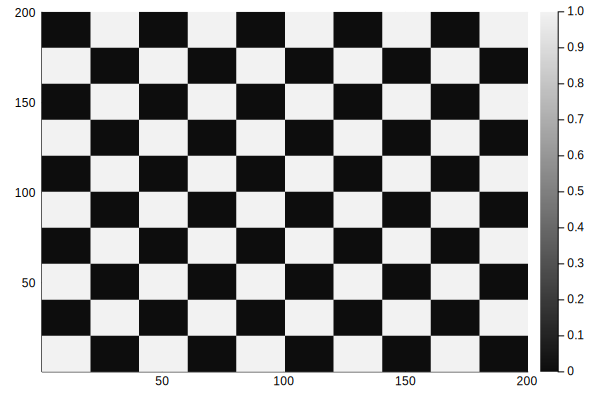

In [108]:
plot(ground, st = :heatmap, color = :grays)

In [89]:
size(population)

(400, 400)

In [135]:
rand([0,-1,1], 2)

2-element Array{Int64,1}:
 0
 0